In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("C://Users//annal//aim//static//csv//Forbes_Billionaires.csv")
print(df.columns)

Index(['Rank ', 'Name', 'Networth', 'Age', 'Country', 'Source', 'Industry'], dtype='object')


# Определим бизнес цели:
## 1- Прогнозирование состояния миллиардера(регрессия)
## 2- Прогнозирование возраста миллиардера(классификация)

# Подготовим данные: категоризируем колонку age

In [2]:
print(df.isnull().sum())

print()

# Есть ли пустые значения признаков
print(df.isnull().any())

print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

Rank        0
Name        0
Networth    0
Age         0
Country     0
Source      0
Industry    0
dtype: int64

Rank        False
Name        False
Networth    False
Age         False
Country     False
Source      False
Industry    False
dtype: bool



In [2]:


bins = [0, 30, 40, 50, 60, 70, 80, 101]  # границы для возрастных категорий
labels = ['Under 30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']  # метки для категорий

df["Age_category"] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
# Удаляем оригинальные колонки 'country', 'industry' и 'source' из исходного DataFrame
df.drop(columns=['Age'], inplace=True)

# Просмотр результата
print(df.head())

   Rank                        Name  Networth        Country  \
0      1                 Elon Musk      219.0  United States   
1      2                Jeff Bezos      171.0  United States   
2      3  Bernard Arnault & family      158.0         France   
3      4                Bill Gates      129.0  United States   
4      5            Warren Buffett      118.0  United States   

               Source                Industry Age_category  
0       Tesla, SpaceX             Automotive         50-60  
1              Amazon             Technology         50-60  
2                LVMH       Fashion & Retail         70-80  
3           Microsoft             Technology         60-70  
4  Berkshire Hathaway  Finance & Investments           80+  


In [27]:
from utils import split_stratified_into_train_val_test

X_train, X_val, X_test, y_train, y_val, y_test = split_stratified_into_train_val_test(
    df, stratify_colname="Age_category", frac_train=0.80, frac_val=0, frac_test=0.20, random_state=9
)

display("X_train", X_train)
display("y_train", y_train)

display("X_test", X_test)
display("y_test", y_test)

'X_train'

Rank                           Name  Networth         Country  \
1909   1818       Tran Ba Duong & family        1.6         Vietnam   
2099   2076                   Mark Dixon        1.4  United Kingdom   
1392   1341                  Yingzhuo Xu        2.3           China   
627     622                  Bruce Flatt        4.6          Canada   
527     523                  Li Liangbin        5.2           China   
...     ...                           ...       ...             ...   
84       85  Theo Albrecht, Jr. & family       18.7         Germany   
633     622                   Tony Tamer        4.6   United States   
922     913                 Bob Gaglardi        3.3          Canada   
2178   2076                    Eugene Wu        1.4          Taiwan   
415     411                Leonard Stern        6.2   United States   

                  Source                Industry Age_category  
1909          automotive             Automotive         60-70  
2099  office real estate            Real Estate         60-70  
1392        agribusiness        Food & Beverage         50-60  
627     money management  Finance & Investments         50-60  
527              lithium          Manufacturing         50-60  
...                  ...                     ...          ...  
84    Aldi, Trader Joe's       Fashion & Retail         70-80  
633       private equity  Finance & Investments         60-70  
922               hotels            Real Estate           80+  
2178             finance  Finance & Investments         70-80  
415          real estate            Real Estate           80+  

[2080 rows x 7 columns]

'y_train'

Age_category
1909        60-70
2099        60-70
1392        50-60
627         50-60
527         50-60
...           ...
84          70-80
633         60-70
922           80+
2178        70-80
415           80+

[2080 rows x 1 columns]

'X_test'

Rank                      Name  Networth        Country  \
2075   2076     Radhe Shyam Agarwal        1.4          India   
1529   1513           Robert Duggan        2.0  United States   
1803   1729            Yao Kuizhang        1.7          China   
425     424        Alexei Kuzmichev        6.0         Russia   
2597   2578          Ramesh Genomal        1.0    Philippines   
...     ...                      ...       ...            ...   
935     913           Alfred Oetker        3.3        Germany   
1541   1513              Thomas Lee        2.0  United States   
1646   1645  Roberto Angelini Rossi        1.8          Chile   
376     375           Patrick Drahi        6.6         France   
1894   1818         Gerald Schwartz        1.6         Canada   

                     Source                Industry Age_category  
2075         consumer goods       Fashion & Retail         70-80  
1529        pharmaceuticals             Healthcare         70-80  
1803              beverages        Food & Beverage         50-60  
425   oil, banking, telecom                 Energy         50-60  
2597                apparel       Fashion & Retail         70-80  
...                     ...                     ...          ...  
935          consumer goods       Fashion & Retail         50-60  
1541         private equity  Finance & Investments         70-80  
1646       forestry, mining          diversified           70-80  
376                 telecom                Telecom         50-60  
1894                finance  Finance & Investments           80+  

[520 rows x 7 columns]

'y_test'

Age_category
2075        70-80
1529        70-80
1803        50-60
425         50-60
2597        70-80
...           ...
935         50-60
1541        70-80
1646        70-80
376         50-60
1894          80+

[520 rows x 1 columns]

# Формирование конвейера для классификации данных
## preprocessing_num -- конвейер для обработки числовых данных: заполнение пропущенных значений и стандартизация
## preprocessing_cat -- конвейер для обработки категориальных данных: заполнение пропущенных данных и унитарное кодирование
## features_preprocessing -- трансформер для предобработки признаков
## features_engineering -- трансформер для конструирования признаков
## drop_columns -- трансформер для удаления колонок
## pipeline_end -- основной конвейер предобработки данных и конструирования признаков

In [37]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import pandas as pd

# Исправляем ColumnTransformer с сохранением имен колонок
columns_to_drop = ["Age_category", "Rank ", "Name"]

num_columns = [
    column
    for column in X_train.columns
    if column not in columns_to_drop and X_train[column].dtype != "object"
]
cat_columns = [
    column
    for column in X_train.columns
    if column not in columns_to_drop and X_train[column].dtype == "object"
]

# Предобработка числовых данных
num_imputer = SimpleImputer(strategy="median")
num_scaler = StandardScaler()
preprocessing_num = Pipeline(
    [
        ("imputer", num_imputer),
        ("scaler", num_scaler),
    ]
)

# Предобработка категориальных данных
cat_imputer = SimpleImputer(strategy="constant", fill_value="unknown")
cat_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
preprocessing_cat = Pipeline(
    [
        ("imputer", cat_imputer),
        ("encoder", cat_encoder),
    ]
)

# Общая предобработка признаков
features_preprocessing = ColumnTransformer(
    verbose_feature_names_out=True,  # Сохраняем имена колонок
    transformers=[
        ("prepocessing_num", preprocessing_num, num_columns),
        ("prepocessing_cat", preprocessing_cat, cat_columns),
    ],
    remainder="drop"  # Убираем неиспользуемые столбцы
)

# Итоговый конвейер
pipeline_end = Pipeline(
    [
        ("features_preprocessing", features_preprocessing),
    ]
)

# Преобразуем данные
preprocessing_result = pipeline_end.fit_transform(X_train)

# Создаем DataFrame с правильными именами колонок
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
    index=X_train.index,  # Сохраняем индексы
)

preprocessed_df

prepocessing_num__Networth  prepocessing_cat__Country_Argentina  \
1909                   -0.309917                                  0.0   
2099                   -0.329245                                  0.0   
1392                   -0.242268                                  0.0   
627                    -0.019995                                  0.0   
527                     0.037990                                  0.0   
...                          ...                                  ...   
84                      1.342637                                  0.0   
633                    -0.019995                                  0.0   
922                    -0.145628                                  0.0   
2178                   -0.329245                                  0.0   
415                     0.134630                                  0.0   

      prepocessing_cat__Country_Australia  prepocessing_cat__Country_Austria  \
1909                                  0.0                                0.0   
2099                                  0.0                                0.0   
1392                                  0.0                                0.0   
627                                   0.0                                0.0   
527                                   0.0                                0.0   
...                                   ...                                ...   
84                                    0.0                                0.0   
633                                   0.0                                0.0   
922                                   0.0                                0.0   
2178                                  0.0                                0.0   
415                                   0.0                                0.0   

      prepocessing_cat__Country_Barbados  prepocessing_cat__Country_Belgium  \
1909                                 0.0                                0.0   
2099                                 0.0                                0.0   
1392                                 0.0                                0.0   
627                                  0.0                                0.0   
527                                  0.0                                0.0   
...                                  ...                                ...   
84                                   0.0                                0.0   
633                                  0.0                                0.0   
922                                  0.0                                0.0   
2178                                 0.0                                0.0   
415                                  0.0                                0.0   

      prepocessing_cat__Country_Belize  prepocessing_cat__Country_Brazil  \
1909                               0.0                               0.0   
2099                               0.0                               0.0   
1392                               0.0                               0.0   
627                                0.0                               0.0   
527                                0.0                               0.0   
...                                ...                               ...   
84                                 0.0                               0.0   
633                                0.0                               0.0   
922                                0.0                               0.0   
2178                               0.0                               0.0   
415                                0.0                               0.0   

      prepocessing_cat__Country_Bulgaria  prepocessing_cat__Country_Canada  \
1909                                 0.0                               0.0   
2099                                 0.0                               0.0   
1392                                 0.0                               0

# Формирование набора моделей для классификации
## logistic -- логистическая регрессия
## ridge -- гребневая регрессия
## decision_tree -- дерево решений
## knn -- k-ближайших соседей
## naive_bayes -- наивный Байесовский классификатор
## gradient_boosting -- метод градиентного бустинга (набор деревьев решений)
## random_forest -- метод случайного леса (набор деревьев решений)
## mlp -- многослойный персептрон (нейронная сеть)

In [38]:
from sklearn import ensemble, linear_model, naive_bayes, neighbors, neural_network, tree

class_models = {
    "logistic": {"model": linear_model.LogisticRegression()},
    # "ridge": {"model": linear_model.RidgeClassifierCV(cv=5, class_weight="balanced")},
    "ridge": {"model": linear_model.LogisticRegression(penalty="l2", class_weight="balanced")},
    "decision_tree": {
        "model": tree.DecisionTreeClassifier(max_depth=7, random_state=9)
    },
    "knn": {"model": neighbors.KNeighborsClassifier(n_neighbors=7)},
    "naive_bayes": {"model": naive_bayes.GaussianNB()},
    "gradient_boosting": {
        "model": ensemble.GradientBoostingClassifier(n_estimators=210)
    },
    "random_forest": {
        "model": ensemble.RandomForestClassifier(
            max_depth=11, class_weight="balanced", random_state=9
        )
    },
    "mlp": {
        "model": neural_network.MLPClassifier(
            hidden_layer_sizes=(7,),
            max_iter=500,
            early_stopping=True,
            random_state=9,
        )
    },
}

# Обучение моделей на обучающем наборе данных и оценка на тестовом

In [43]:
y_train['Age_category'] = y_train['Age_category'].cat.codes
y_test['Age_category'] = y_test['Age_category'].cat.codes

In [44]:
import numpy as np
from sklearn import metrics

for model_name in class_models.keys():
    print(f"Model: {model_name}")
    model = class_models[model_name]["model"]

    model_pipeline = Pipeline([("pipeline", pipeline_end), ("model", model)])
    model_pipeline = model_pipeline.fit(X_train, y_train)

    y_train_predict = model_pipeline.predict(X_train)
    y_test_probs = model_pipeline.predict_proba(X_test)
    y_test_predict = np.argmax(y_test_probs, axis=1)

    class_models[model_name]["pipeline"] = model_pipeline
    class_models[model_name]["probs"] = y_test_probs
    class_models[model_name]["preds"] = y_test_predict

    # Метрики
    class_models[model_name]["Precision_train"] = metrics.precision_score(
        y_train, y_train_predict, average="macro"
    )
    class_models[model_name]["Precision_test"] = metrics.precision_score(
        y_test, y_test_predict, average="macro"
    )
    class_models[model_name]["Recall_train"] = metrics.recall_score(
        y_train, y_train_predict, average="macro"
    )
    class_models[model_name]["Recall_test"] = metrics.recall_score(
        y_test, y_test_predict, average="macro"
    )
    class_models[model_name]["Accuracy_train"] = metrics.accuracy_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Accuracy_test"] = metrics.accuracy_score(
        y_test, y_test_predict
    )
    class_models[model_name]["ROC_AUC_test"] = metrics.roc_auc_score(
        y_test, y_test_probs, multi_class="ovr"
    )
    class_models[model_name]["F1_train"] = metrics.f1_score(
        y_train, y_train_predict, average="macro"
    )
    class_models[model_name]["F1_test"] = metrics.f1_score(
        y_test, y_test_predict, average="macro"
    )
    class_models[model_name]["MCC_test"] = metrics.matthews_corrcoef(
        y_test, y_test_predict
    )
    class_models[model_name]["Cohen_kappa_test"] = metrics.cohen_kappa_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Confusion_matrix"] = metrics.confusion_matrix(
        y_test, y_test_predict
    )

Model: logistic


c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samp

Model: ridge


c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to 

Model: decision_tree
Model: knn


c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: naive_bayes


c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: gradient_boosting


c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model: random_forest


c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: mlp


c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Сводная таблица оценок качества для использованных моделей классификации

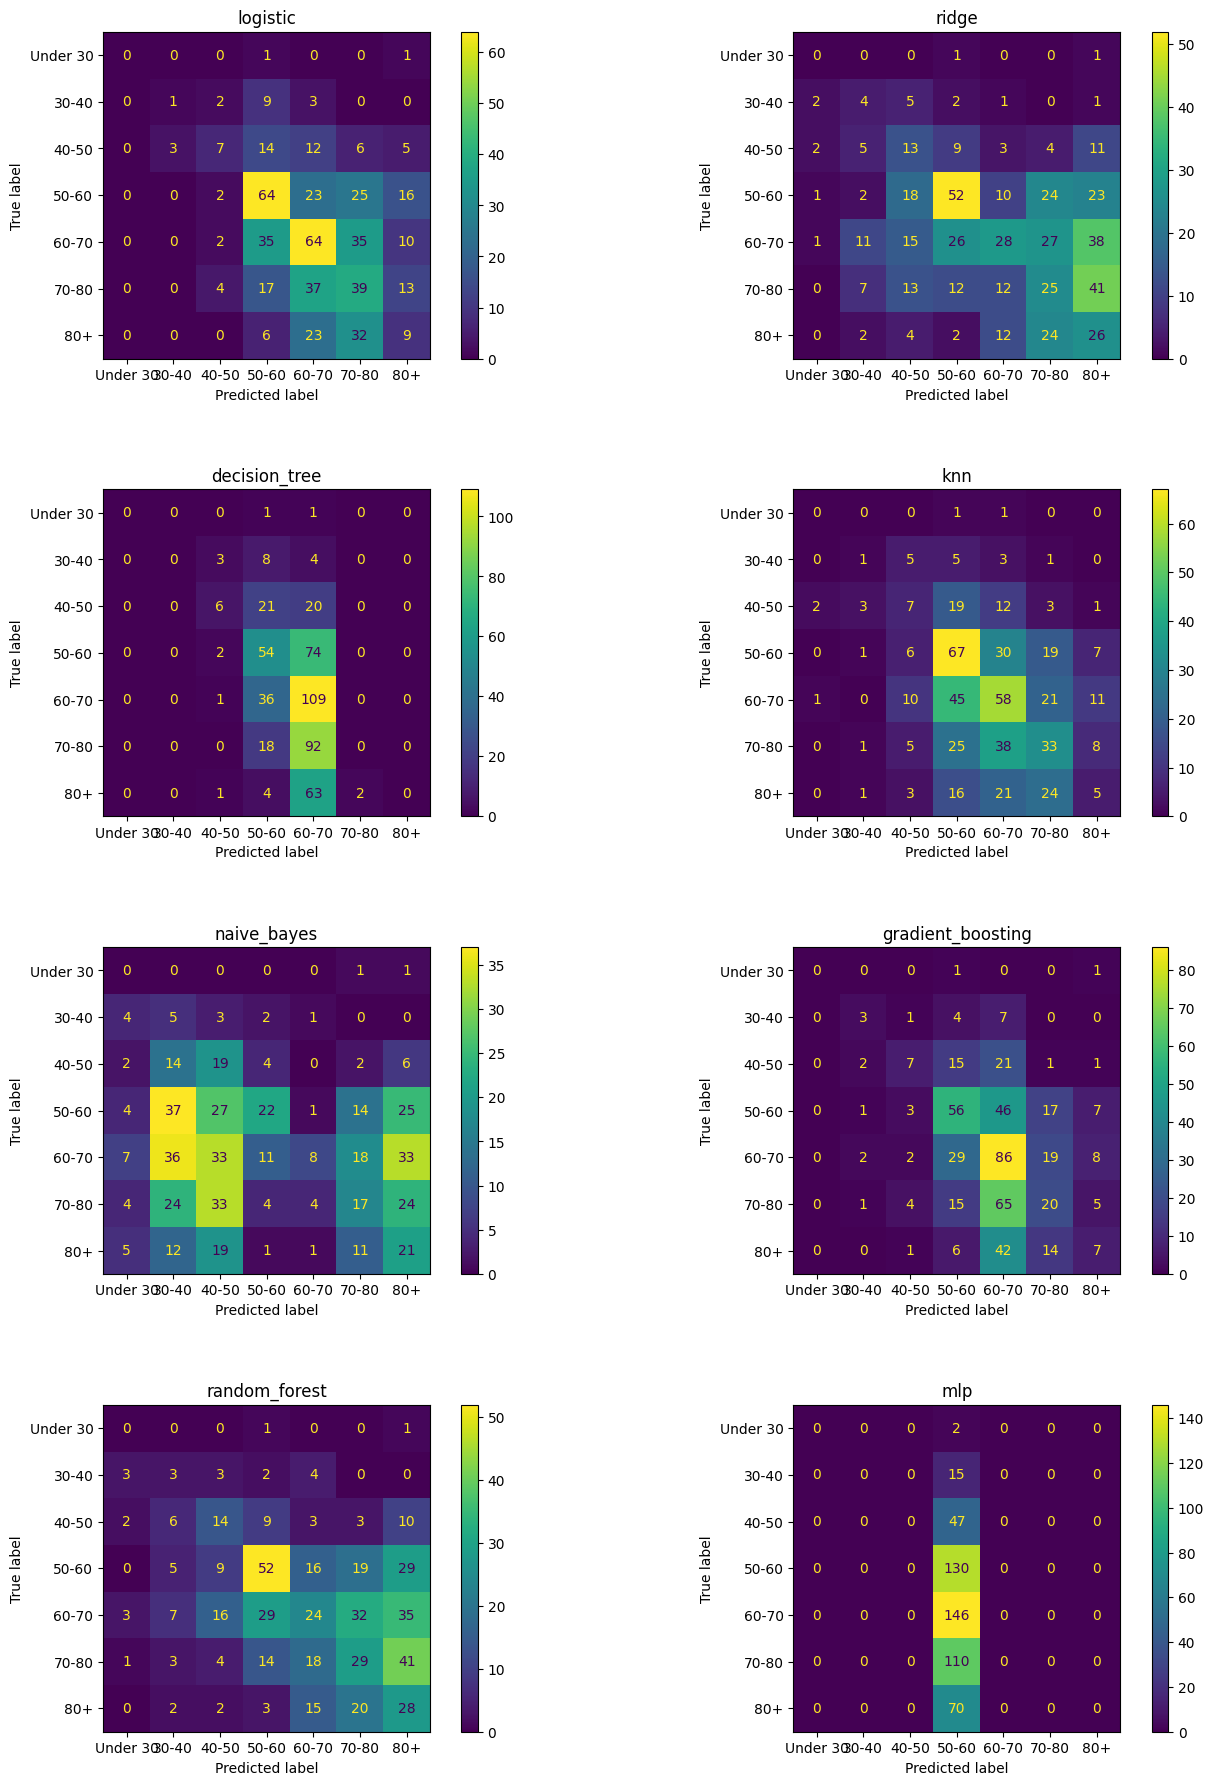

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

_, ax = plt.subplots(int(len(class_models) / 2), 2, figsize=(17, 17), sharex=False, sharey=False)
for index, key in enumerate(class_models.keys()):
    c_matrix = class_models[key]["Confusion_matrix"]
    disp = ConfusionMatrixDisplay(
        confusion_matrix=c_matrix, display_labels=["Under 30", "30-40", "40-50", "50-60", "60-70", "70-80", "80+"]
    ).plot(ax=ax.flat[index])
    disp.ax_.set_title(key)

plt.subplots_adjust(top=1, bottom=0, hspace=0.4, wspace=0.1)
plt.show()

## Точность, полнота, верность (аккуратность), F-мера

In [52]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
        "Accuracy_train",
        "Accuracy_test",
        "F1_train",
        "F1_test",
    ]
]
class_metrics.sort_values(
    by="Accuracy_test", ascending=False
).style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=["Accuracy_train", "Accuracy_test", "F1_train", "F1_test"],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
    ],
)

## значения далеки от идела, датасет так себе...

In [51]:
pip install Jinja2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## ROC-кривая, каппа Коэна, коэффициент корреляции Мэтьюса

In [53]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Accuracy_test",
        "F1_test",
        "ROC_AUC_test",
        "Cohen_kappa_test",
        "MCC_test",
    ]
]
class_metrics.sort_values(by="ROC_AUC_test", ascending=False).style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=[
        "ROC_AUC_test",
        "MCC_test",
        "Cohen_kappa_test",
    ],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Accuracy_test",
        "F1_test",
    ],
)

In [54]:
best_model = str(class_metrics.sort_values(by="MCC_test", ascending=False).iloc[0].name)

display(best_model)

'logistic'

## Вывод данных с ошибкой предсказания для оценки

In [56]:
preprocessing_result = pipeline_end.transform(X_test)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

y_pred = class_models[best_model]["preds"]

error_index = y_test[y_test["Age_category"] != y_pred].index.tolist()
display(f"Error items count: {len(error_index)}")

error_predicted = pd.Series(y_pred, index=y_test.index).loc[error_index]
error_df = X_test.loc[error_index].copy()
error_df.insert(loc=1, column="Predicted", value=error_predicted)
error_df.sort_index()

c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


'Error items count: 336'

Rank   Predicted                        Name  Networth        Country  \
6         7          4                Sergey Brin      107.0  United States   
8         9          3              Steve Ballmer       91.4  United States   
12       13          3  Carlos Slim Helu & family       81.2         Mexico   
14       15          3            Mark Zuckerberg       67.3  United States   
22       23          5             Amancio Ortega       59.6          Spain   
...     ...        ...                         ...       ...            ...   
2586   2578          3         Roy Chi Ping Chung        1.0      Hong Kong   
2588   2578          3              Ronald Clarke        1.0  United States   
2591   2578          5        Sefik Yilmaz Dizdar        1.0         Turkey   
2593   2578          6                 Larry Fink        1.0  United States   
2596   2578          5               Nari Genomal        1.0    Philippines   

                   Source                Industry Age_category  
6                  Google             Technology         40-50  
8               Microsoft             Technology         60-70  
12                telecom                Telecom           80+  
14               Facebook             Technology         30-40  
22                   Zara       Fashion & Retail           80+  
...                   ...                     ...          ...  
2586        manufacturing          Manufacturing         60-70  
2588  payments technology             Technology         60-70  
2591       fashion retail       Fashion & Retail           80+  
2593     money management  Finance & Investments         60-70  
2596              apparel       Fashion & Retail           80+  

[336 rows x 8 columns]

## Многовато...

## Пример использования обученной модели (конвейера) для предсказания

In [57]:
model = class_models[best_model]["pipeline"]

example_id = 450
test = pd.DataFrame(X_test.loc[example_id, :]).T
test_preprocessed = pd.DataFrame(preprocessed_df.loc[example_id, :]).T
display(test)
display(test_preprocessed)
result_proba = model.predict_proba(test)[0]
result = model.predict(test)[0]
real = int(y_test.loc[example_id].values[0])
display(f"predicted: {result} (proba: {result_proba})")
display(f"real: {real}")

Rank           Name Networth    Country        Source        Industry  \
450   438  Ruan Liping       5.8  Hong Kong  power strips  Manufacturing    

    Age_category  
450        50-60

prepocessing_num__Networth  prepocessing_cat__Country_Argentina  \
450                    0.289255                                  0.0   

     prepocessing_cat__Country_Australia  prepocessing_cat__Country_Austria  \
450                                  0.0                                0.0   

     prepocessing_cat__Country_Barbados  prepocessing_cat__Country_Belgium  \
450                                 0.0                                0.0   

     prepocessing_cat__Country_Belize  prepocessing_cat__Country_Brazil  \
450                               0.0                               0.0   

     prepocessing_cat__Country_Bulgaria  prepocessing_cat__Country_Canada  \
450                                 0.0                               0.0   

     ...  prepocessing_cat__Industry_Logistics   \
450  ...                                    0.0   

     prepocessing_cat__Industry_Manufacturing   \
450                                        0.0   

     prepocessing_cat__Industry_Media & Entertainment   \
450                                                1.0   

     prepocessing_cat__Industry_Metals & Mining   \
450                                          0.0   

     prepocessing_cat__Industry_Real Estate   \
450                                      0.0   

     prepocessing_cat__Industry_Service   prepocessing_cat__Industry_Sports   \
450                                  0.0                                 0.0   

     prepocessing_cat__Industry_Technology   \
450                                     0.0   

     prepocessing_cat__Industry_Telecom   \
450                                  0.0   

     prepocessing_cat__Industry_diversified     
450                                        0.0  

[1 rows x 860 columns]

c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


'predicted: 3 (proba: [0.00172036 0.04303104 0.02714323 0.36848158 0.19524859 0.2037863\n 0.1605889 ])'

'real: 3'

## Подбор гиперпараметров методом поиска по сетке

In [60]:
from sklearn.model_selection import GridSearchCV

optimized_model_type = "random_forest"

random_forest_model = class_models[optimized_model_type]["pipeline"]

param_grid = {
    "model__n_estimators": [10, 20, 30, 40, 50, 100, 150, 200, 250, 500],
    "model__max_features": ["sqrt", "log2", 2],
    "model__max_depth": [2, 3, 4, 5, 6, 7, 8, 9 ,10],
    "model__criterion": ["gini", "entropy", "log_loss"],
}

gs_optomizer = GridSearchCV(
    estimator=random_forest_model, param_grid=param_grid, n_jobs=-1
)
gs_optomizer.fit(X_train, y_train.values.ravel())
gs_optomizer.best_params_

c:\Users\annal\aim\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'model__criterion': 'gini',
 'model__max_depth': 10,
 'model__max_features': 2,
 'model__n_estimators': 250}

## Обучение модели с новыми гиперпараметрами

In [66]:
optimized_model = ensemble.RandomForestClassifier(
    random_state=9,
    criterion="gini",
    max_depth=10,
    max_features=2,
    n_estimators=250,
)

result = {}

result["pipeline"] = Pipeline([("pipeline", pipeline_end), ("model", optimized_model)]).fit(X_train, y_train.values.ravel())
result["train_preds"] = result["pipeline"].predict(X_train)
result["probs"] = result["pipeline"].predict_proba(X_test)[:, 1]
result["preds"] = np.where(result["probs"] > 0.5, 1, 0)

result["Precision_train"] = metrics.precision_score(y_train, result["train_preds"],average="macro")
result["Precision_test"] = metrics.precision_score(y_test, result["preds"], average="macro")
result["Recall_train"] = metrics.recall_score(y_train, result["train_preds"], average="macro")
result["Recall_test"] = metrics.recall_score(y_test, result["preds"], average="macro")
result["Accuracy_train"] = metrics.accuracy_score(y_train, result["train_preds"])
result["Accuracy_test"] = metrics.accuracy_score(y_test, result["preds"])
result["ROC_AUC_test"] = metrics.roc_auc_score(y_test, result["probs"], multi_class="ovr")
result["F1_train"] = metrics.f1_score(y_train, result["train_preds"], average="macro")
result["F1_test"] = metrics.f1_score(y_test, result["preds"], average="macro")
result["MCC_test"] = metrics.matthews_corrcoef(y_test, result["preds"])
result["Cohen_kappa_test"] = metrics.cohen_kappa_score(y_test, result["preds"])
result["Confusion_matrix"] = metrics.confusion_matrix(y_test, result["preds"])

c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AxisError: axis 1 is out of bounds for array of dimension 1